In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

def classify_report(ytest,y_pred):
    cm = confusion_matrix(ytest,y_pred)
    print("Confusion Matrix:\n",cm)
    error_rate = 1 - accuracy_score(ytest,y_pred)
    print("classification report:\n")
    print(classification_report(ytest,y_pred))
    print('Accuracy:\n',accuracy_score(ytest,y_pred))
    print('ErrorRate:\n',cohen_kappa_score(ytest,y_pred))

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
url ='C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.1 titanic.csv'
df = pd.read_csv(url).fillna(0)
#data cleaning , dropping column
df = df.drop('Name',axis=1)
df = df.drop('SexCode',axis=1)
#create mapper
PClass_mapper = {'1st':1,'2nd':2,'3rd':3}
gender_mapper = {'female':1,'male':2}

#replacing feature values with scale
df['PClass'] = df['PClass'].replace(PClass_mapper)
df['Sex'] = df['Sex'].replace(gender_mapper)
#replacing missing values of age with mean of age
df['Age'] = np.where(df['Age']==0,np.mean(df['Age']),df['Age'])
#input features
x = df.iloc[:,:3].values
#output class
y = df.iloc[:, 3].values

#splitting the data into training and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
# knn model creation 
knn = KNeighborsClassifier(n_neighbors=10)

#fit model
knn.fit(xtrain,ytrain)
#perform predictions
y_pred_knn = knn.predict(xtest)

classify_report(ytest,y_pred_knn)

Confusion Matrix:
 [[238  26]
 [ 66  64]]
classification report:

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       264
           1       0.71      0.49      0.58       130

    accuracy                           0.77       394
   macro avg       0.75      0.70      0.71       394
weighted avg       0.76      0.77      0.75       394

Accuracy:
 0.766497461928934
ErrorRate:
 0.4271807838179519


In [2]:
from sklearn.ensemble import RandomForestClassifier
#randomforest model creation 
rfc = RandomForestClassifier(n_estimators=5)
#fit the model
rfc.fit(xtrain,ytrain)
#perform predictions
y_pred_rfc = rfc.predict(xtest)
#classification report
classify_report(ytest,y_pred_rfc)

Confusion Matrix:
 [[243  21]
 [ 56  74]]
classification report:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       264
           1       0.78      0.57      0.66       130

    accuracy                           0.80       394
   macro avg       0.80      0.74      0.76       394
weighted avg       0.80      0.80      0.80       394

Accuracy:
 0.8045685279187818
ErrorRate:
 0.525598123534011


In [3]:
from sklearn import tree
#desicion tree model creation
dtc = tree.DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
#predictions
y_pred_dtc = dtc.predict(xtest)
classify_report(ytest,y_pred_dtc)

Confusion Matrix:
 [[244  20]
 [ 57  73]]
classification report:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       264
           1       0.78      0.56      0.65       130

    accuracy                           0.80       394
   macro avg       0.80      0.74      0.76       394
weighted avg       0.80      0.80      0.79       394

Accuracy:
 0.8045685279187818
ErrorRate:
 0.5236016456769574


In [4]:
from sklearn.svm import SVC
svcclassifier = SVC()
svcclassifier.fit(xtrain,ytrain)
y_pred_svm = svcclassifier.predict(xtest)
classify_report(ytest,y_pred_svm)

Confusion Matrix:
 [[261   3]
 [119  11]]
classification report:

              precision    recall  f1-score   support

           0       0.69      0.99      0.81       264
           1       0.79      0.08      0.15       130

    accuracy                           0.69       394
   macro avg       0.74      0.54      0.48       394
weighted avg       0.72      0.69      0.59       394

Accuracy:
 0.6903553299492385
ErrorRate:
 0.0946963989754408


In [5]:
from sklearn.naive_bayes import GaussianNB
#create a Gaussian Naive bayes model
gnb = GaussianNB()
#fit the model
gnb.fit(xtrain,ytrain)
y_pred_gnb = gnb.predict(xtest)
#classification report
classify_report(ytest,y_pred_gnb)

Confusion Matrix:
 [[188  76]
 [ 33  97]]
classification report:

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       264
           1       0.56      0.75      0.64       130

    accuracy                           0.72       394
   macro avg       0.71      0.73      0.71       394
weighted avg       0.75      0.72      0.73       394

Accuracy:
 0.7233502538071066
ErrorRate:
 0.422784333754469


In [6]:
#logistic regression
from sklearn.linear_model import LogisticRegression
# logisticRegression
logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)
y_pred_lr = logisticclassifier.predict(xtest)
classify_report(ytest,y_pred_lr)

Confusion Matrix:
 [[255   9]
 [ 62  68]]
classification report:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       264
           1       0.88      0.52      0.66       130

    accuracy                           0.82       394
   macro avg       0.84      0.74      0.77       394
weighted avg       0.83      0.82      0.80       394

Accuracy:
 0.8197969543147208
ErrorRate:
 0.5454190906431798


AUC value for KNN: 0.696911421911422
AUC value for Random Forest: 0.7448426573426573
AUC value for Decision Tree: 0.7428904428904429
AUC value for Gaussian Naive Bayes: 0.7291375291375292
AUC value for Support Vector Machine: 0.536625874125874
AUC value for Logistic Regression: 0.7444930069930069


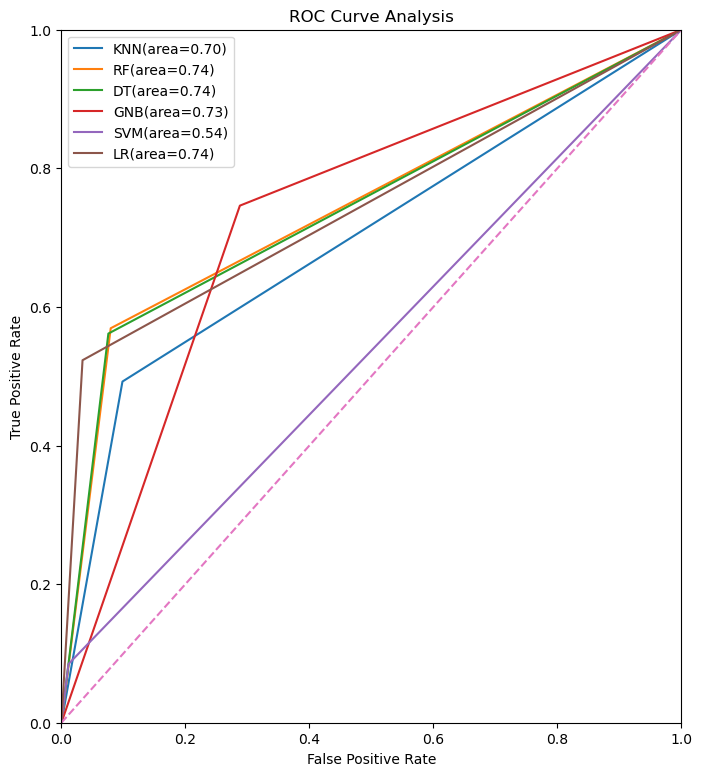

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(ytest,y_pred_knn,pos_label=1,drop_intermediate=False)
fpr1, tpr1, thresholds1 = roc_curve(ytest,y_pred_rfc,pos_label=1,drop_intermediate=False)
fpr2, tpr2, thresholds2 = roc_curve(ytest,y_pred_dtc,pos_label=1,drop_intermediate=False)
fpr3, tpr3, thresholds3 = roc_curve(ytest,y_pred_gnb,pos_label=1,drop_intermediate=False)
fpr4, tpr4, thresholds4 = roc_curve(ytest,y_pred_svm,pos_label=1,drop_intermediate=False)
fpr5, tpr5, thresholds5 = roc_curve(ytest,y_pred_lr,pos_label=1,drop_intermediate=False)
auc_score_knn = roc_auc_score(ytest,y_pred_knn)
auc_score_rfc = roc_auc_score(ytest,y_pred_rfc)
auc_score_dtc = roc_auc_score(ytest,y_pred_dtc)
auc_score_gnb = roc_auc_score(ytest,y_pred_gnb)
auc_score_svm = roc_auc_score(ytest,y_pred_svm)
auc_score_lr = roc_auc_score(ytest,y_pred_lr)
print("AUC value for KNN:",auc_score_knn)
print("AUC value for Random Forest:",auc_score_rfc)
print("AUC value for Decision Tree:",auc_score_dtc)
print("AUC value for Gaussian Naive Bayes:",auc_score_gnb)
print("AUC value for Support Vector Machine:",auc_score_svm)
print("AUC value for Logistic Regression:",auc_score_lr)

fig = plt.figure(figsize=(8,9))
plt.plot(fpr,tpr,label='KNN(area=%0.2f)'%auc_score_knn)
plt.plot(fpr1,tpr1,label='RF(area=%0.2f)'%auc_score_rfc)
plt.plot(fpr2,tpr2,label='DT(area=%0.2f)'%auc_score_dtc)
plt.plot(fpr3,tpr3,label='GNB(area=%0.2f)'%auc_score_gnb)
plt.plot(fpr4,tpr4,label='SVM(area=%0.2f)'%auc_score_svm)
plt.plot(fpr5,tpr5,label='LR(area=%0.2f)'%auc_score_lr)
plt.legend(loc='best')
plt.plot([0,1],[0,1],'--')
#setting x limit of x-axis
plt.xlim(0.0,1.0)
#setting y limit of y-axis
plt.ylim(0.0,1.0)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Analysis')
plt.show()